In [1]:
import pandas as pd
import numpy as np

In [2]:
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
data_url = 'D:\Pycharm_projects\DataScience_goit\DataScience_goit\module3\course_1\habr_popularity_data\howpop_train.csv'

In [4]:
data = pd.read_csv(data_url)

In [5]:
data.head()

,url,domain,post_id,published,author,flow,polling,content_len,title,comments,favs,views,votes_plus,votes_minus,views_lognorm,favs_lognorm,comments_lognorm
0,https://habrahabr.ru/post/18284/,habrahabr.ru,18284,2008-01-01 18:19:00,@Tapac,develop,False,4305,Новогодний подарок блоггерам — WordPress 2.3.2,0,0,236,0.0,0.0,-0.792687,-1.344075,-2.436871
1,https://habrahabr.ru/post/18285/,habrahabr.ru,18285,2008-01-01 18:30:00,@DezmASter,design,False,7344,"Сумасшедшие яйца, или сервис для отслеживания ...",1,1,353,1.0,0.0,-0.485214,-0.831946,-1.873193
2,https://habrahabr.ru/post/18286/,habrahabr.ru,18286,2008-01-01 18:34:00,@DezmASter,design,False,8431,"Сумасшедшие яйца, или сервис для отслеживания ...",47,72,1200,45.0,5.0,0.446090,1.794023,0.574656
3,https://habrahabr.ru/post/18291/,habrahabr.ru,18291,2008-01-02 01:32:00,@Taoorus,design,False,5662,"Сглаживание шрифтов, и субпиксельная отрисовка",102,36,5700,72.0,3.0,1.627469,1.300050,1.167375
4,https://geektimes.ru/post/18294/,geektimes.ru,18294,2008-01-02 14:34:00,@dennydo,NaN,False,3706,Почему мне не нравится iPhone,230,6,1400,73.0,15.0,1.362397,0.961094,2.020356


In [6]:
data.shape

(134137, 17)

In [7]:
data.drop(
    filter(lambda c: c.endswith("_lognorm"), data.columns),
    axis=1,  # axis = 1: столбцы
    inplace=True,
)

In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
post_id,134137.0,181307.054265,81766.350702,18284.0,115565.0,182666.0,257401.0,314088.0
content_len,134137.0,7516.929699,8724.771640,1.0,2179.0,4949.0,9858.0,352471.0
comments,134137.0,39.625994,62.398958,0.0,7.0,19.0,48.0,2266.0
favs,134137.0,71.999866,145.854135,0.0,8.0,27.0,78.0,8718.0
views,134137.0,16631.013084,31479.819691,3.0,2100.0,7600.0,18700.0,1730000.0
votes_plus,133566.0,35.536888,42.461073,0.0,11.0,22.0,45.0,1466.0
votes_minus,133566.0,8.050035,11.398282,0.0,2.0,5.0,10.0,445.0


In [9]:
data.describe(include=["object", "bool"]).T  # бинарные и категориальные переменные

,count,unique,top,freq
url,134137,134137,https://habrahabr.ru/post/18284/,1
domain,134137,2,habrahabr.ru,97048
published,134137,130291,2011-06-14 15:52:00,39
author,97657,22077,@alizar,5292
flow,97048,6,develop,53318
polling,134137,2,False,129412
title,134137,133628,"Интересные события, произошедшие в выходные",56


In [10]:
# настройка внешнего вида графиков в seaborn
sns.set_style("dark")
sns.set_palette("RdBu")
sns.set_context(
    "notebook", font_scale=1.5, rc={"figure.figsize": (15, 5), "axes.titlesize": 18}
)

In [11]:
print(data.published.dtype)
data["published"] = pd.to_datetime(data.published, yearfirst=True)
print(data.published.dtype)

object
datetime64[ns]


In [12]:
data["year"] = [d.year for d in data.published]
data["month"] = [d.month for d in data.published]

data["dayofweek"] = [d.isoweekday() for d in data.published]
data["hour"] = [d.hour for d in data.published]

# 1. В каком месяце (и какого года) было больше всего публикаций?  
март 2016  
март 2015  
апрель 2015  
апрель 2016  

In [13]:
data.columns

Index(['url', 'domain', 'post_id', 'published', 'author', 'flow', 'polling',
       'content_len', 'title', 'comments', 'favs', 'views', 'votes_plus',
       'votes_minus', 'year', 'month', 'dayofweek', 'hour'],
      dtype='object')

In [14]:
data.year.unique()

array([2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016], dtype=int64)

In [15]:
data.month.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

In [16]:
data.head()

,url,domain,post_id,published,author,flow,polling,content_len,title,comments,favs,views,votes_plus,votes_minus,year,month,dayofweek,hour
0,https://habrahabr.ru/post/18284/,habrahabr.ru,18284,2008-01-01 18:19:00,@Tapac,develop,False,4305,Новогодний подарок блоггерам — WordPress 2.3.2,0,0,236,0.0,0.0,2008,1,2,18
1,https://habrahabr.ru/post/18285/,habrahabr.ru,18285,2008-01-01 18:30:00,@DezmASter,design,False,7344,"Сумасшедшие яйца, или сервис для отслеживания ...",1,1,353,1.0,0.0,2008,1,2,18
2,https://habrahabr.ru/post/18286/,habrahabr.ru,18286,2008-01-01 18:34:00,@DezmASter,design,False,8431,"Сумасшедшие яйца, или сервис для отслеживания ...",47,72,1200,45.0,5.0,2008,1,2,18
3,https://habrahabr.ru/post/18291/,habrahabr.ru,18291,2008-01-02 01:32:00,@Taoorus,design,False,5662,"Сглаживание шрифтов, и субпиксельная отрисовка",102,36,5700,72.0,3.0,2008,1,3,1
4,https://geektimes.ru/post/18294/,geektimes.ru,18294,2008-01-02 14:34:00,@dennydo,NaN,False,3706,Почему мне не нравится iPhone,230,6,1400,73.0,15.0,2008,1,3,14


In [17]:
filtered_data = data[(data['year'].isin([2015, 2016])) & (data['month'].isin([3, 4]))]

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='year', ylabel='count'>

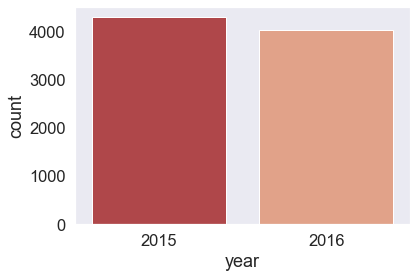

In [18]:
sns.countplot(filtered_data['year'])

In [19]:
data1 = filtered_data[['year', 'month']].value_counts()

In [20]:
data1

year  month
2015  3        2189
2016  3        2115
2015  4        2110
2016  4        1910
dtype: int64

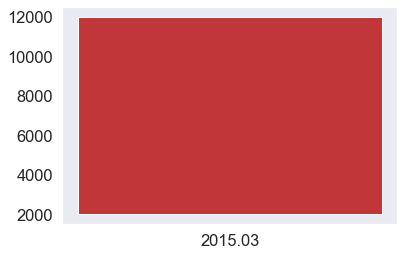

In [21]:
plt.bar(
    x='2015.03',
    y=2000,
    height=10000
)
plt.show()

<BarContainer object of 4 artists>

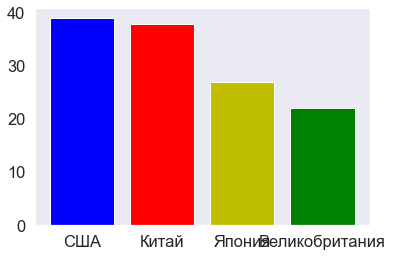

In [22]:
plt.bar(
    ["США", "Китай", "Япония", "Великобритания"],
    [39, 38, 27, 22],
    color=["b", "r", "y", "g"],
)


<BarContainer object of 4 artists>

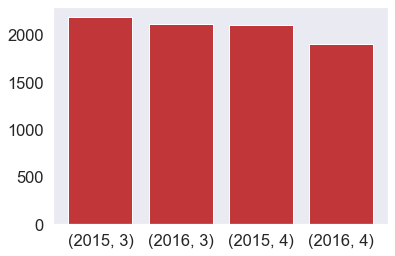

In [23]:
plt.bar(
    [str(i) for i in data1.index],
    [data1[i] for i in data1.index],
    
)

In [24]:
ff = data[(data['year'] == 2015) & (data['month'] == 3)]

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='dayofweek', ylabel='count'>

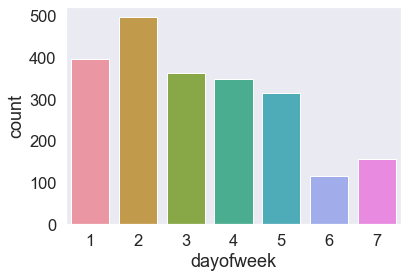

In [25]:
sns.countplot(ff['dayofweek'])

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='domain', ylabel='count'>

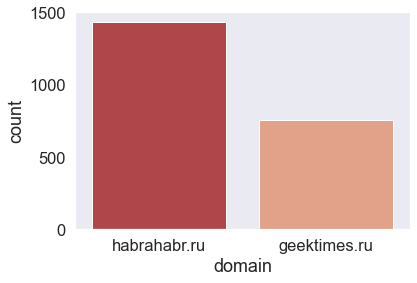

In [26]:
sns.countplot(ff['domain'])

<AxesSubplot:xlabel='dayofweek', ylabel='count'>

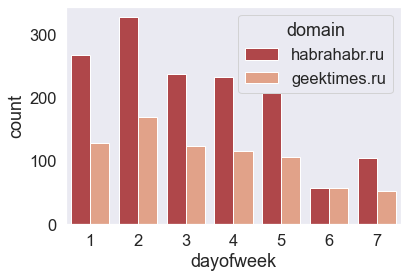

In [27]:
sns.countplot(x='dayofweek', hue='domain', data=ff)

In [29]:
data.groupby('author')['votes_minus']

<AxesSubplot:xlabel='hour'>

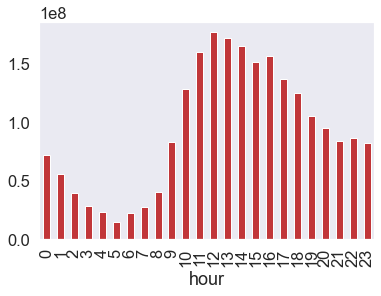

In [31]:
data.groupby('hour')['views'].agg(sum).plot(kind='bar')

<AxesSubplot:xlabel='hour'>

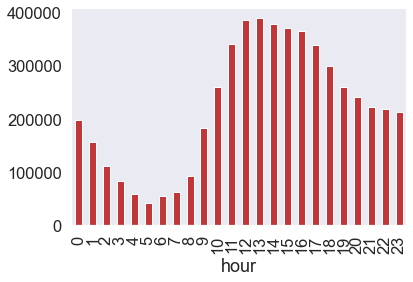

In [32]:
data.groupby('hour')['comments'].agg(sum).plot(kind='bar')

In [33]:
data[(data['domain'] == 'geektimes.ru')][['hour','comments']].max()

hour          23
comments    2266
dtype: int64

In [34]:
data[data['comments'] == 2266]

,url,domain,post_id,published,author,flow,polling,content_len,title,comments,favs,views,votes_plus,votes_minus,year,month,dayofweek,hour
38763,https://geektimes.ru/post/123157/,geektimes.ru,123157,2011-07-01 02:35:00,@Dottore,NaN,False,2158,Как раздавать инвайты на Google+,2266,24,15300,226.0,55.0,2011,7,5,2


<AxesSubplot:xlabel='hour', ylabel='count'>

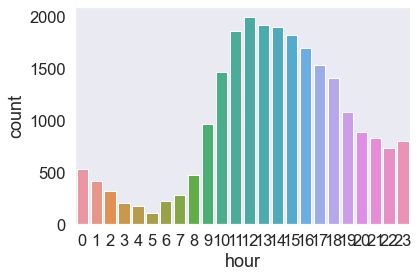

In [35]:
sns.countplot(x='hour', data=data[data['dayofweek'] == 1])

<AxesSubplot:xlabel='hour', ylabel='count'>

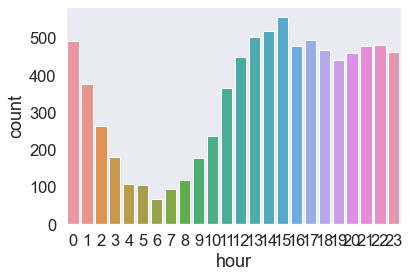

In [36]:
sns.countplot(x='hour', data=data[data['dayofweek'] == 6])

In [37]:
data['dayofweek'].unique()

array([2, 3, 4, 5, 6, 7, 1], dtype=int64)

In [41]:
data['get_minus'] = data['votes_minus'] > 0

In [76]:
data.groupby('author')['get_minus'].count().nlargest(5)

author
@alizar              5292
@marks               4711
@SLY_G               1939
@ivansychev          1350
@semen_grinshtein    1171
Name: get_minus, dtype: int64

In [65]:
data.groupby('author')['url'].count().nlargest(20)

author
@alizar              5292
@marks               4711
@SLY_G               1939
@ivansychev          1350
@semen_grinshtein    1171
@jeston              1060
@aleksandrit          633
@XaocCPS              603
@Mithgol              560
@Mordatyj             546
@Shapelez             537
@ilya42               512
@atomlib              452
@ragequit             444
@Tylerskald           439
@andorro              278
@jasiejames           213
@lozga                200
@Sterhel              191
@Jeditobe             181
Name: url, dtype: int64

<AxesSubplot:xlabel='hour', ylabel='count'>

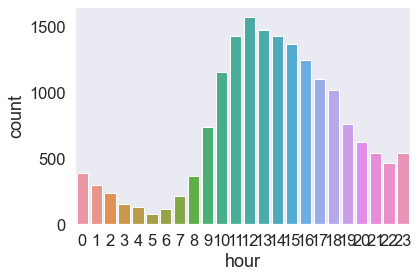

In [53]:
sns.countplot(x='hour', data=data[(data['dayofweek'] == 1) & (data['domain'] == 'habrahabr.ru')])

In [63]:
pp

author
@alizar              5072
@marks               3918
@SLY_G               1863
@ivansychev           960
@jeston               904
@aleksandrit          629
@XaocCPS              578
@Mithgol              555
@Mordatyj             532
@ilya42               490
@semen_grinshtein     443
@Tylerskald           413
@ragequit             385
@Shapelez             360
@atomlib              359
@andorro              270
@Sterhel              191
@Jeditobe             180
@Boomburum            162
@Shpankov             144
Name: get_minus, dtype: int64